# 📊 Biztel.ai - EDA & Advanced Visualization Notebook

This notebook loads the dataset, processes it step-by-step, and shows all useful insights in a simple way.

##  What this notebook covers:
- Agent Message Distribution 
- Sentiment Distribution by Agent  
- Word Clouds for Agent 1 and Agent 2  
- Top Words in each Sentiment Category (Positive, Neutral, etc.)   
- Message Length Distribution 
- Sentiment Timeline (Message Index vs Sentiment)  
- TF-IDF Keyword Extraction 
- Bonus Feature Engineering like:
  - Message Length
  - Message Index
  - Sentiment Encoding

All charts will also get saved automatically inside the `/notebooks/` folder for your easy reference.


In [19]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malyajnailwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
SAVE_PATH = "../notebooks/"


In [7]:
!pip install wordcloud nltk

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords

from src.data_loader import DataLoader
from src.data_cleaner import DataCleaner
from src.data_transformer import DataTransformer
from src.eda_analysis import plot_agent_distribution, plot_sentiment_distribution


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malyajnailwal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load and clean data
data_path = "../data/BiztelAI_DS_Dataset_Mar25.json"

loader = DataLoader(data_path)
raw_data = loader.load_json()
df = loader.to_dataframe(raw_data)
df = DataCleaner(df).clean_data()
df = DataTransformer(df).encode_categorical()


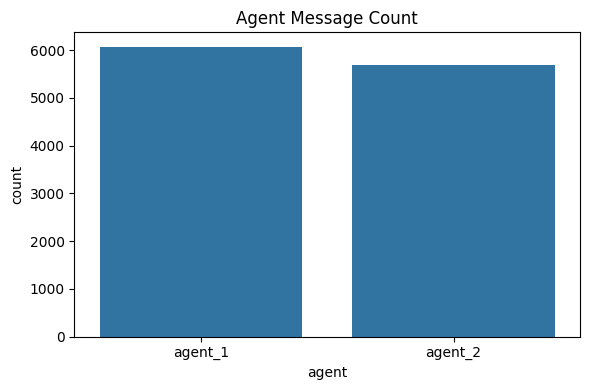

In [9]:
# Plot: Agent Message Distribution
plot_agent_distribution(df)

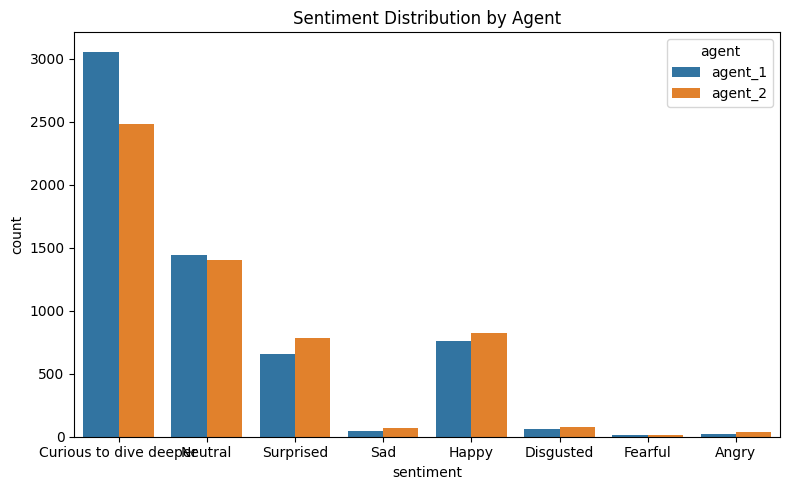

In [10]:
# Plot: Sentiment Distribution by Agent
plot_sentiment_distribution(df)

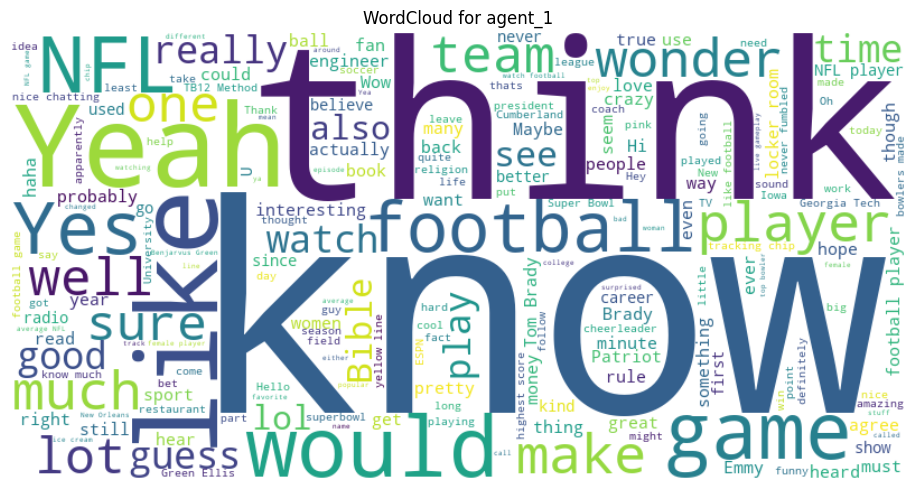

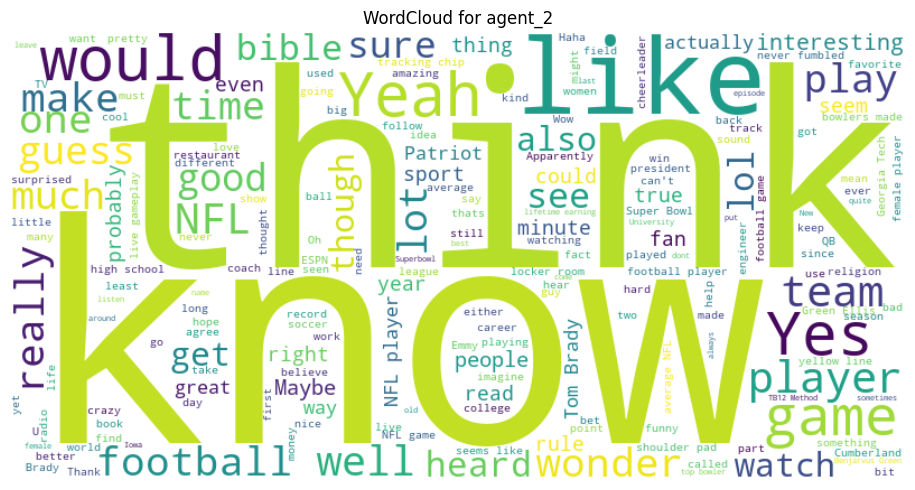

In [ ]:
# WordClouds (Per Agent)
from wordcloud import WordCloud

def generate_wordcloud(agent_name):
    text = " ".join(df[df['agent'] == agent_name]['message'].dropna().astype(str))
    wc = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {agent_name}')
    plt.tight_layout()
    filename = f"{SAVE_PATH}wordcloud_{agent_name}.png"
    plt.savefig(filename)
    plt.show()

generate_wordcloud('agent_1')
generate_wordcloud('agent_2')



/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


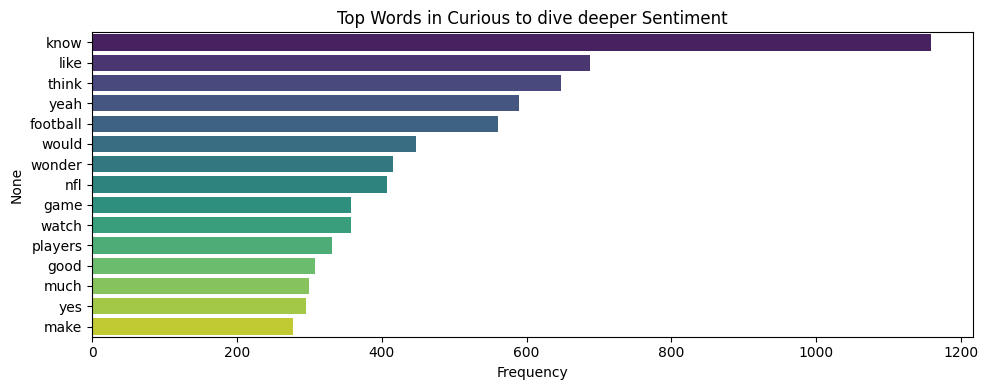

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


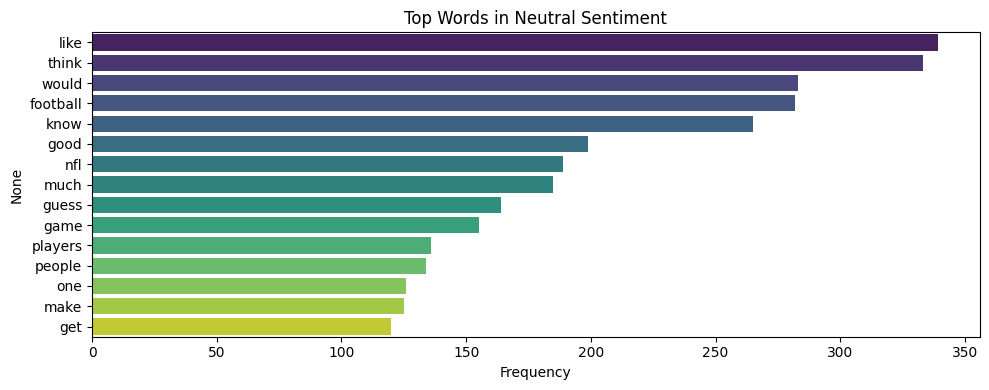

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


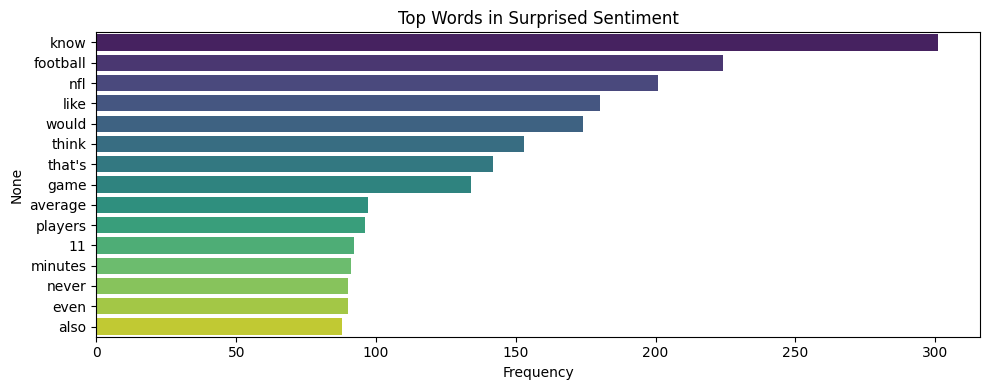

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


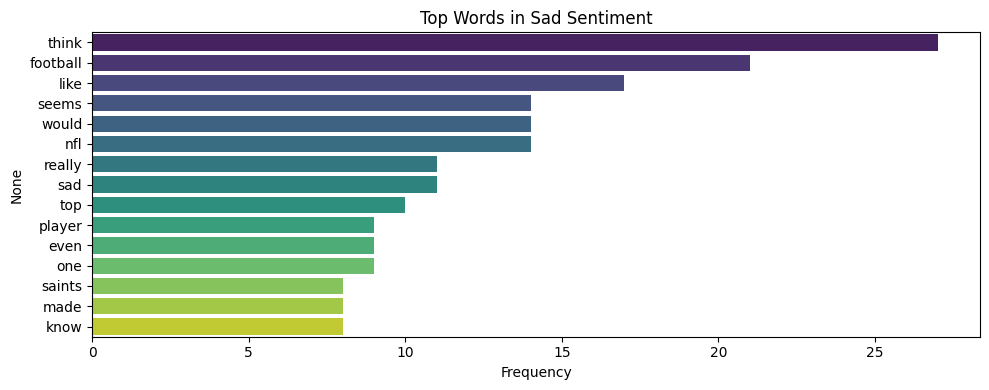

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


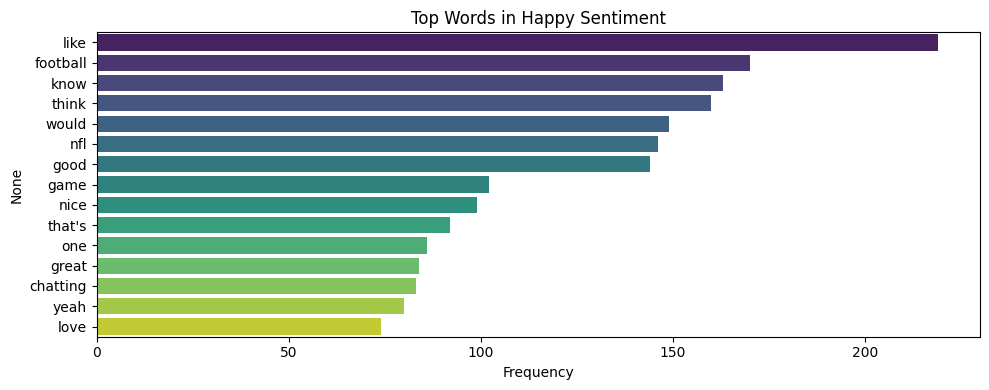

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


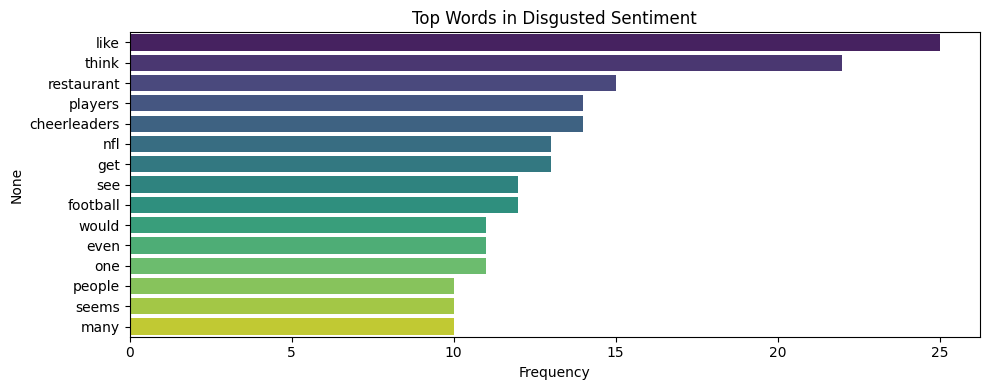

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


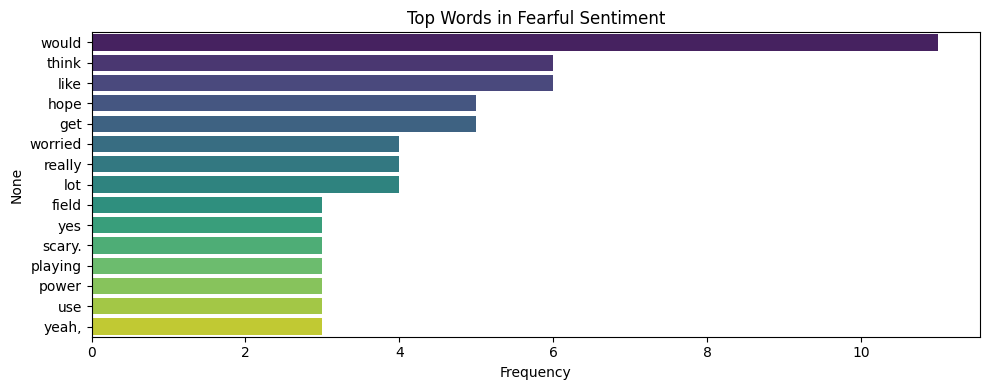

/var/folders/xb/l2x233n56wbdsp3lx1nlcvyr0000gn/T/ipykernel_67654/76747494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


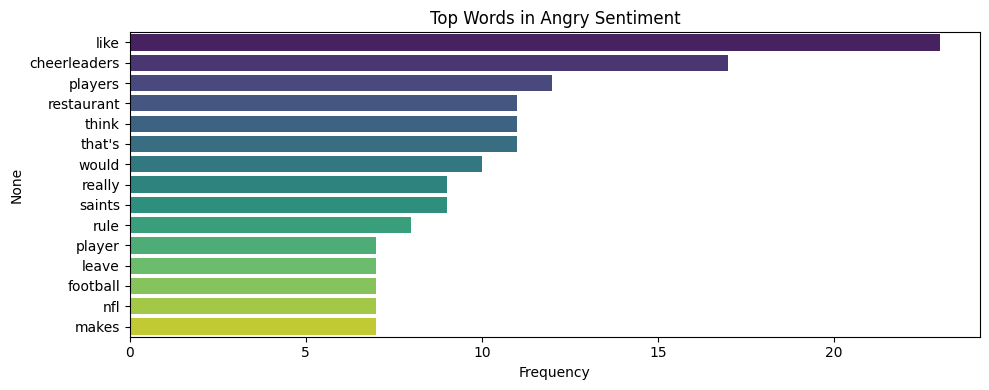

In [15]:
#Top Keywords by Sentiment
def top_words_by_sentiment(sentiment_label):
    text = " ".join(df[df['sentiment'] == sentiment_label]['message'].dropna().astype(str))
    words = pd.Series(text.lower().split())
    words = words[~words.isin(stop_words)]
    top = words.value_counts().head(15)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top.values, y=top.index, palette='viridis')
    plt.title(f'Top Words in {sentiment_label} Sentiment')
    plt.xlabel("Frequency")
    plt.tight_layout()
    filename = f"{SAVE_PATH}top_words_{sentiment_label.replace(' ', '_')}.png"
    plt.savefig(filename)
    plt.show()

for sentiment in df['sentiment'].dropna().unique():
    top_words_by_sentiment(sentiment)



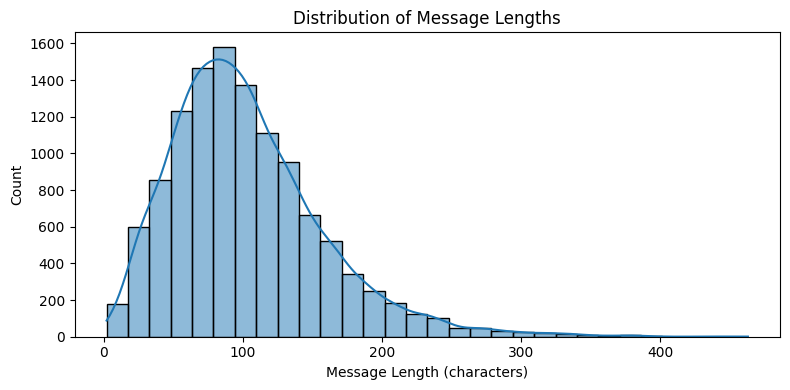

In [16]:
#Message Length Distribution 
df['msg_length'] = df['message'].astype(str).apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df['msg_length'], bins=30, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.tight_layout()
plt.savefig(f"{SAVE_PATH}message_length_distribution.png")
plt.show()


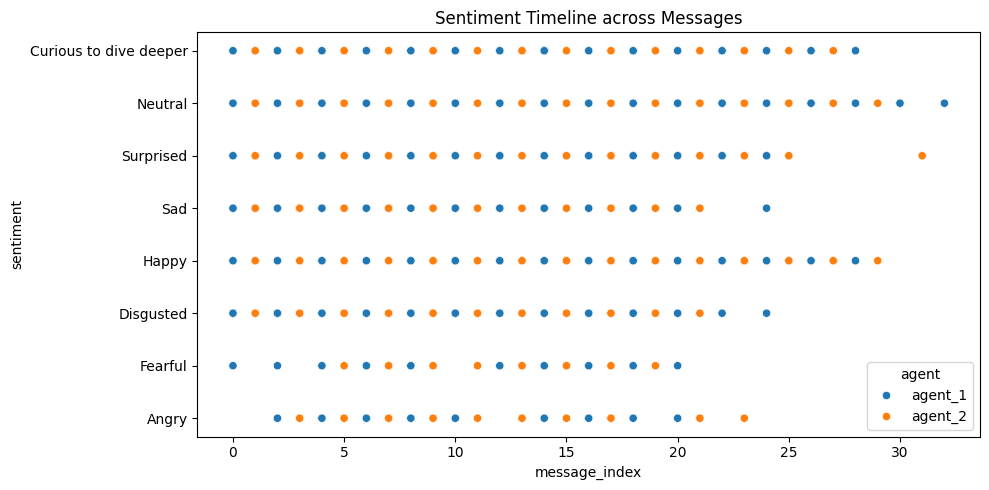

In [17]:
#Sentiment Timeline Plot
df['message_index'] = df.groupby('conversation_id').cumcount()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='message_index', y='sentiment', hue='agent')
plt.title("Sentiment Timeline across Messages")
plt.tight_layout()
plt.savefig(f"{SAVE_PATH}sentiment_timeline_plot.png")
plt.show()


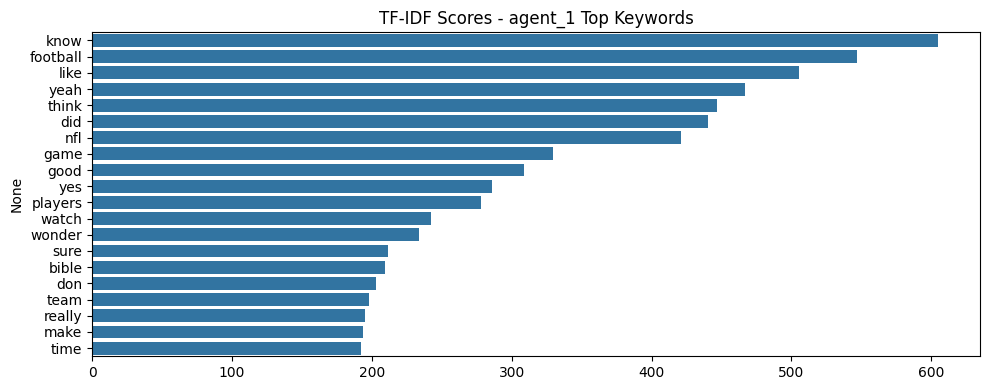

In [18]:
#TF-IDF Barplot
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
agent1_texts = df[df['agent'] == 'agent_1']['message'].dropna().astype(str)
tfidf_matrix = tfidf.fit_transform(agent1_texts)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_scores = tfidf_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index)
plt.title("TF-IDF Scores - agent_1 Top Keywords")
plt.tight_layout()
plt.savefig(f"{SAVE_PATH}tfidf_agent1_keywords.png")
plt.show()
